In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [3]:
#Other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
#Make the dataset
N = 1000
X = np.random.random((N,2))*6-3 #uniformly distributed between (-3,+3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

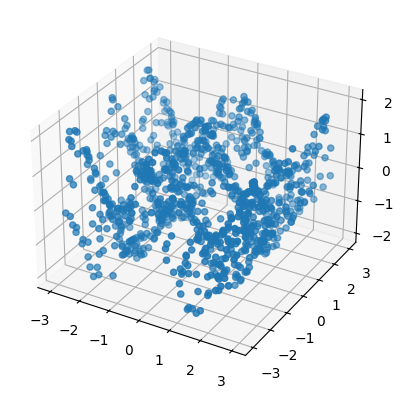

In [6]:
#Plot it
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
#plt.show()

In [7]:
#Build the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_shape=(2,),activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
#Compile and Fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt,loss='mse')
r = model.fit(X,Y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0036
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9537
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9310
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9543 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9235 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7890 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8188
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7634 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6538 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5993 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6390 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5555 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5216 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5390  
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 

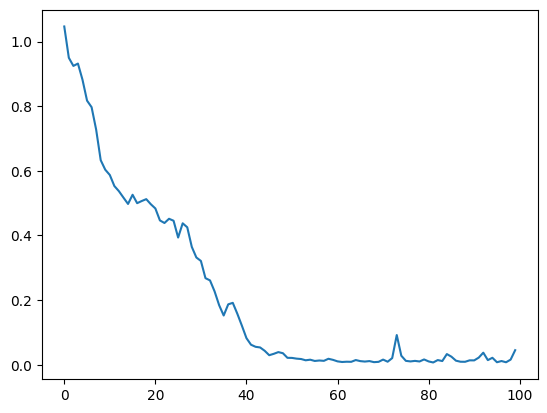

In [12]:
#Plot the loss
plt.plot(r.history['loss'],label='loss')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


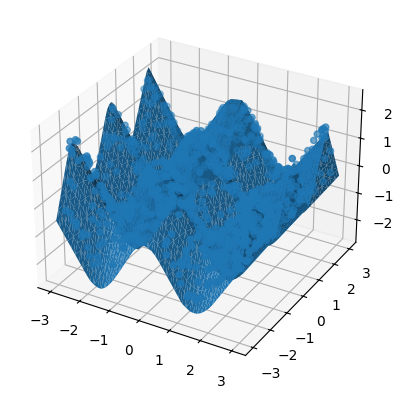

In [17]:
#Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
#Surface plot
line = np.linspace(-3,3,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2,antialiased=True)
plt.show()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


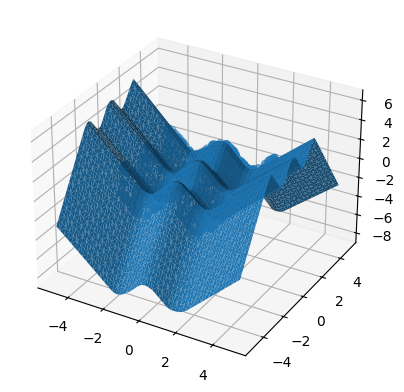

In [18]:
#Can it extropoalte?
#Plot the prediction surface
fig= plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

#surface plot
line = np.linspace(-5,5,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2,antialiased=True)
plt.show()

---

In [ ]:
N = 1000  # 1000 örnek oluşturulacak
X = np.random.random((N,2))*6-3  # X, iki özellikli bir matristir, değerleri [-3, +3] aralığında rastgele
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])  # Y, X'e bağlı bir doğrusal olmayan fonksiyondur


Amaç: X ve Y arasında doğrusal olmayan bir ilişki tanımlayan bir veri seti oluşturuluyor.
np.random.random((N,2)): (N, 2) boyutunda rastgele veriler oluşturur, değerler [0, 1] arasında.
*6-3: Verileri [-3, +3] aralığına ölçeklendirir.
np.cos: Trigonometrik kosinüs fonksiyonu, doğrusal olmayan bir ilişki yaratır.

In [ ]:
fig = plt.figure()  # Yeni bir figür oluştur
ax = fig.add_subplot(111, projection='3d')  # 3D eksen ekle
ax.scatter(X[:,0], X[:,1], Y)  # 3D veri noktalarını çizer


Amaç: X[:,0], X[:,1] ve Y arasındaki ilişkilerin 3D görselleştirilmesi.
scatter: Nokta tabanlı grafik.

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),  # İlk katman: 128 nöronlu, ReLU aktivasyonu
    tf.keras.layers.Dense(1)  # Çıkış katmanı: Tek bir değer döndürür
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Amaç: X'ten Y'yi tahmin edebilen bir model oluşturmak.
ReLU: Doğrusal olmayan aktivasyon fonksiyonu, karmaşık ilişkileri öğrenmek için kullanılır.

In [ ]:
opt = tf.keras.optimizers.Adam(0.01)  # Adam optimizasyon algoritması
model.compile(optimizer=opt, loss='mse')  # Kayıp fonksiyonu: Ortalama kare hata (MSE)
r = model.fit(X, Y, epochs=100)  # Modeli 100 epoch boyunca eğitir


Amaç: Modelin parametrelerini optimize etmek ve Y'yi doğru şekilde tahmin etmesini sağlamak.
Adam: Hızlı yakınsama sağlar.
MSE: Sürekli değer tahmini için kullanılan bir kayıp fonksiyonu.

In [ ]:
plt.plot(r.history['loss'], label='loss')  # Eğitim kayıplarını çizer


Amaç: Kayıp değerlerinin nasıl azaldığını görselleştirmek.
Düşen kayıplar: Modelin veriye daha iyi uyum sağladığını gösterir.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)  # Gerçek verileri çizer

# Yüzey oluştur
line = np.linspace(-3, 3, 50)  # -3 ile 3 arasında 50 nokta
xx, yy = np.meshgrid(line, line)  # Grid oluştur
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T  # Grid'i vektöre dönüştür
Yhat = model.predict(Xgrid).flatten()  # Model tahminleri
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)  # Tahmin yüzeyini çizer
plt.show()


Amaç: Modelin tahmin ettiği yüzeyi görselleştirerek gerçek verilerle karşılaştırma yapmak.
np.meshgrid: 2D grid oluşturur.
plot_trisurf: 3D yüzey grafiği çizer.


In [ ]:
line = np.linspace(-5, 5, 50)  # [-5, 5] aralığına kadar genişletilmiş grid
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)


Amaç: Modelin veri dışındaki tahminlerini görselleştirmek.
Eğer model veriye aşırı uymuşsa (overfitting), genişletilmiş aralıkta yüzey gerçekçi olmayabilir.